In [14]:
import numpy as np

# This class implements the SGD algorithm with constant/decaying step-size,
# and computes the stochastic gradient using a single sample as input
class StochasticGradientDescent:
    def __init__(self, learning_rate=0.01, constant_step_size=True):
        self.lr = learning_rate
        self.is_constant = constant_step_size
        self.weights = None

    # Run the sgd algorithm over all the data samples
    def run_sgd(self, X, y, cost_funct):
        n_features, n_iters = X.shape
        # initialize the parameter vector
        self.weights = np.zeros((n_features, n_iters))
        # iterate over the data samples
        for i in range(1,n_iters):
            #self.weights[:,i-1].reshape(-1,1)
            #X[:,i].reshape(-1,1)
            #print(f"shape of Y: {y.shape}")
            #y[i]
            grad = compute_gradient_logreg(self.weights[:, i-1].reshape(-1, 1), X[:, i].reshape(-1, 1), y[i]).ravel()
            self.weights[:, i] = self.weights[:, i-1] - self.lr * grad
        return self.weights

# logistic regression stochastic gradient
def compute_gradient_logreg(w, X, y):
    return -y * X/( 1+np.exp(y * (w.T @ X)) )


In [ ]:
from scipy.io import loadmat

# Carica il file .mat
data = loadmat('../data/homeworkclass.mat')

# Accedi alle variabili
Xpred = data['Xpred']
Xtrain = data['Xtrain']
Ytrain = data['Ytrain']

# Controlla i tipi e le dimensioni
print("Xpred: ", Xpred.shape)
print("Xtrain:", Xtrain.shape)
print("Ytrain:", Ytrain.shape)

Xpred:  (48, 2)
Xtrain: (480000, 2)
Ytrain: (480000, 1)


In [16]:
# Xtrain ha forma (480000, 2)
rows = Xtrain.shape[0]

# Crea un vettore colonna di tutti 1 con lo stesso numero di righe di Xtrain
ones_column = np.ones((rows, 1))

# Aggiungi il vettore colonna come prima colonna di Xtrain
Xtrain = np.hstack([ones_column, Xtrain])
print("Forma di Xtrain con colonna aggiunta:", Xtrain.shape)

Forma di Xtrain con colonna aggiunta: (480000, 3)


In [17]:
# Xpred ha forma (48, 2)
rows = Xpred.shape[0]

# Crea un vettore colonna di tutti 1 con lo stesso numero di righe di Xtrain
ones_column = np.ones((rows, 1))

# Aggiungi il vettore colonna come prima colonna di Xtrain
Xpred = np.hstack([ones_column, Xpred])
print("Forma di Xpred con colonna aggiunta:", Xpred.shape)

Forma di Xpred con colonna aggiunta: (48, 3)


In [18]:
Xpred = Xpred.T
Xtrain = Xtrain.T
Ytrain = Ytrain # y non va trasposta?

# Controlla i tipi e le dimensioni
print("Xpred: ", Xpred.shape)
print("Xtrain:", Xtrain.shape)
print("Ytrain:", Ytrain.shape)

Xpred:  (3, 48)
Xtrain: (3, 480000)
Ytrain: (480000, 1)


In [19]:
# Cambio delle label in -1 e 1
Ytrain = Ytrain.astype(np.int8)
Ytrain = Ytrain * 2 - 1
print(Ytrain)

[[-1]
 [ 1]
 [-1]
 ...
 [-1]
 [-1]
 [-1]]


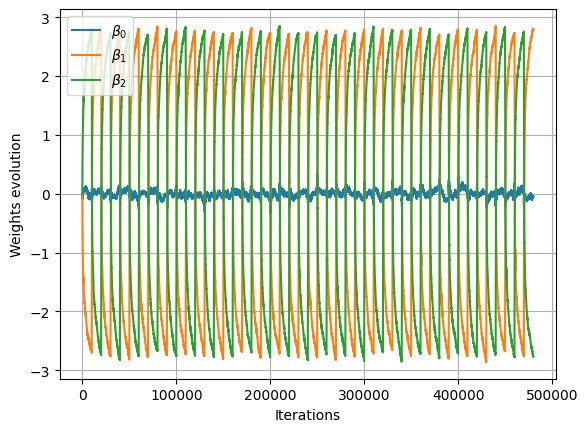

In [20]:
import matplotlib.pyplot as plt

n_features, n_samples = Xtrain.shape

sgd_logreg = StochasticGradientDescent(learning_rate=0.01)
weights_logreg = np.zeros((n_features, n_samples))
weights_logreg = sgd_logreg.run_sgd(Xtrain, Ytrain, 'logloss')

plt.figure()
plt.plot(weights_logreg[0,:], label=r"$\beta_0$")
plt.plot(weights_logreg[1,:], label=r"$\beta_1$")
plt.plot(weights_logreg[2,:], label=r"$\beta_2$")
plt.xlabel("Iterations")
plt.ylabel("Weights evolution")
plt.legend()
plt.grid(True)
plt.show()

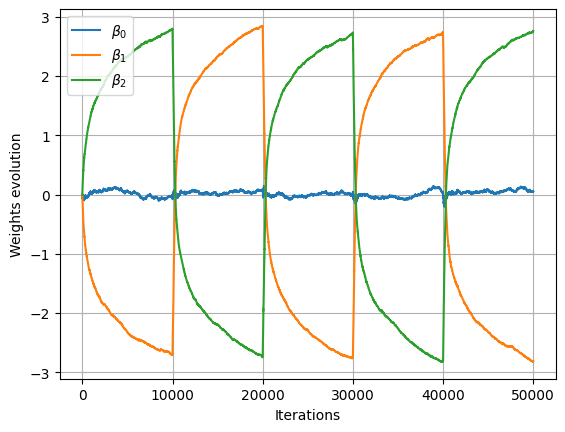

In [21]:
Xtrain_i = Xtrain[:, :50000]
Ytrain_i = Ytrain[:50000, :]
n_features, n_samples = Xtrain.shape

weights_logreg = np.zeros((n_features, n_samples))
weights_logreg = sgd_logreg.run_sgd(Xtrain_i, Ytrain_i, 'logloss')

plt.figure()
plt.plot(weights_logreg[0,:], label=r"$\beta_0$")
plt.plot(weights_logreg[1,:], label=r"$\beta_1$")
plt.plot(weights_logreg[2,:], label=r"$\beta_2$")
plt.xlabel("Iterations")
plt.ylabel("Weights evolution")
plt.legend()
plt.grid(True)
plt.show()

### Notiamo che le tranche sono di 10000 osservazioni l'una, per cui agiamo di conseguenza

In [22]:
predictions = []
interval = 10000 # ogni 10000 sample inizia una nuova tranche
for k in range(1, 49):
    start = (k - 1) * interval
    end = start + interval

    Xtrain_i = Xtrain[:, start:end]
    Ytrain_i = Ytrain[start:end, :]
    
    n_features, n_samples = Xtrain_i.shape
    weights_logreg = np.zeros((n_features, n_samples))

    weights_logreg = sgd_logreg.run_sgd(Xtrain_i, Ytrain_i, 'logloss')
    weights_logreg = weights_logreg[:,-1]

    z = np.dot(weights_logreg.T, Xpred[:, k-1])
    prediction = (z>0).astype(int)
    predictions.append(int(prediction))
predictions = np.array(predictions)
print(predictions)

[0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0
 0 0 1 0 1 1 0 1 1 1 0]


In [23]:
# Group bits into 8-bit chunks
bytes_array = predictions.reshape(-1, 8)

# Convert each 8-bit chunk to an integer
ascii_values = [int("".join(map(str, byte)), 2) for byte in bytes_array]

# Convert ASCII values to characters
word = "".join(chr(value) for value in ascii_values)

print("Converted word:", word)

Converted word: Adrian


### Non solo la previsione è stata svolta correttamente ma possiamo verificare la bontà delle beta selezionate per mezzo di uno scatter plot, ad esempio per l'ultima tranche

Intercetta: -0.049807602786903625
Beta_1: 2.8276035489624953
Beta_2: -2.788043277746654


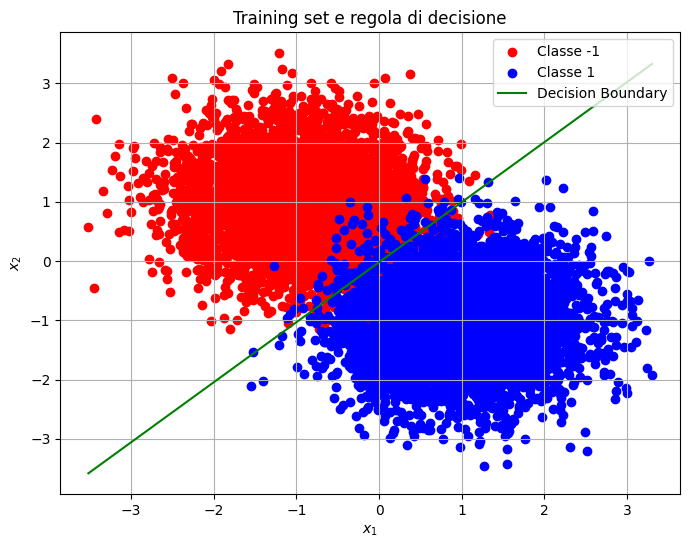

Numero di punti nella classe -1: 4974
Numero di punti nella classe 1: 5026


In [27]:
final_weights_iteration = weights_logreg

Xtrain = Xtrain_i
Ytrain = Ytrain_i

# Estrai i pesi finali
beta_0, beta_1, beta_2 = final_weights_iteration.ravel()
print(f"Intercetta: {beta_0}")
print(f"Beta_1: {beta_1}")
print(f"Beta_2: {beta_2}")

# Disegna i punti
plt.figure(figsize=(8, 6))
plt.scatter(Xtrain[1, Ytrain.ravel() == -1], Xtrain[2, Ytrain.ravel() == -1], color='red', label='Classe -1')
plt.scatter(Xtrain[1, Ytrain.ravel() == 1], Xtrain[2, Ytrain.ravel() == 1], color='blue', label='Classe 1')

# Disegna la retta di decisione
x_vals = np.linspace(Xtrain[1, :].min(), Xtrain[1, :].max(), 100)
decision_boundary = -(beta_0 + beta_1 * x_vals) / beta_2
plt.plot(x_vals, decision_boundary, color='green', label='Decision Boundary')

# Configura il grafico
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Training set e regola di decisione')
plt.legend()
plt.grid(True)
plt.show()

# punti per ciascuna classe
num_class_minus1 = np.sum(Ytrain.ravel() == -1)  # Punti della classe -1
num_class_1 = np.sum(Ytrain.ravel() == 1) # Punti della classe 1
print(f"Numero di punti nella classe -1: {num_class_minus1}")
print(f"Numero di punti nella classe 1: {num_class_1}")